# Import modules

In [ ]:
import numpy as np
import pandas as pd

# Loading the dataset

In [ ]:
df=pd.read_csv('Assignment-4 bank (1).csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.shape

(11162, 17)

In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# Pre-processing the dataset

In [ ]:
#Check for null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
#Shows the columns in a dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
def replace_marital(val):
    if val=="single":
        return 0
    else:
        return 1

df['marital']=df['marital'].apply(replace_marital,1)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,1,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,1,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,1,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,1,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df["housing"]=df["housing"].map({
    "no":0,
    "yes":1
}
.get    
)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,secondary,no,2343,1,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,1,secondary,no,45,0,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,1,secondary,no,1270,1,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,1,secondary,no,2476,1,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,1,tertiary,no,184,0,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,0,primary,no,1,1,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,1,secondary,no,733,0,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,0,secondary,no,29,0,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,1,secondary,no,0,0,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,1,secondary,no,0,0,no,cellular,9,jul,628,1,-1,0,unknown,no


In [ ]:
df["loan"]=df["loan"].replace(
{
    "no":0,
    "yes":1
})

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,secondary,no,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,1,secondary,no,45,0,0,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,1,secondary,no,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,1,secondary,no,2476,1,0,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,1,tertiary,no,184,0,0,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,0,primary,no,1,1,0,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,1,secondary,no,733,0,0,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,0,secondary,no,29,0,0,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,1,secondary,no,0,0,1,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,1,secondary,no,0,0,0,cellular,9,jul,628,1,-1,0,unknown,no


In [ ]:
df["job"].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [ ]:
df["job"].replace({
    'unknown':np.nan,
    'management':0,
    'technician':1,
    'entrepreneur':2,
    'blue-collar':3,
    'retired':4,
    'admin.':5,
    'services':6,
    'self-employed':7,
    'unemployed':8,
    'housemaid':9,
    'student':10,
},inplace=True)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,5.0,1,secondary,no,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,5.0,1,secondary,no,45,0,0,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,1.0,1,secondary,no,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,6.0,1,secondary,no,2476,1,0,unknown,5,may,579,1,-1,0,unknown,yes
4,54,5.0,1,tertiary,no,184,0,0,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,3.0,0,primary,no,1,1,0,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,6.0,1,secondary,no,733,0,0,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,1.0,0,secondary,no,29,0,0,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,1.0,1,secondary,no,0,0,1,cellular,8,may,9,2,172,5,failure,no
11161,34,1.0,1,secondary,no,0,0,0,cellular,9,jul,628,1,-1,0,unknown,no


In [ ]:
df["education"].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [ ]:
df["education"].replace({
    'unknown':np.nan,
    'tertiary':0,
    'secondary':1,
    'primary':2,
},inplace=True)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,5.0,1,1.0,no,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,5.0,1,1.0,no,45,0,0,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,1.0,1,1.0,no,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,6.0,1,1.0,no,2476,1,0,unknown,5,may,579,1,-1,0,unknown,yes
4,54,5.0,1,0.0,no,184,0,0,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,3.0,0,2.0,no,1,1,0,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,6.0,1,1.0,no,733,0,0,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,1.0,0,1.0,no,29,0,0,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,1.0,1,1.0,no,0,0,1,cellular,8,may,9,2,172,5,failure,no
11161,34,1.0,1,1.0,no,0,0,0,cellular,9,jul,628,1,-1,0,unknown,no


In [ ]:
df["default"].replace(
{
    "no":0,
    "yes":1
},inplace=True)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,5.0,1,1.0,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,5.0,1,1.0,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,1.0,1,1.0,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,6.0,1,1.0,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,yes
4,54,5.0,1,0.0,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,3.0,0,2.0,0,1,1,0,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,6.0,1,1.0,0,733,0,0,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,1.0,0,1.0,0,29,0,0,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,1.0,1,1.0,0,0,0,1,cellular,8,may,9,2,172,5,failure,no
11161,34,1.0,1,1.0,0,0,0,0,cellular,9,jul,628,1,-1,0,unknown,no


In [ ]:
df["balance"].min()

-6847

In [ ]:
df["balance"].max()

81204

In [ ]:
df["balance"]=df["balance"].apply(lambda v:(v-df["balance"].min())/(df["balance"].max()-df["balance"].min()))

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,5.0,1,1.0,0,0.104371,1,0,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,5.0,1,1.0,0,0.078273,0,0,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,1.0,1,1.0,0,0.092185,1,0,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,6.0,1,1.0,0,0.105882,1,0,unknown,5,may,579,1,-1,0,unknown,yes
4,54,5.0,1,0.0,0,0.079851,0,0,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,3.0,0,2.0,0,0.077773,1,0,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,6.0,1,1.0,0,0.086086,0,0,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,1.0,0,1.0,0,0.078091,0,0,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,1.0,1,1.0,0,0.077762,0,1,cellular,8,may,9,2,172,5,failure,no
11161,34,1.0,1,1.0,0,0.077762,0,0,cellular,9,jul,628,1,-1,0,unknown,no


In [ ]:
df["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
df["contact"].replace(
{
    'unknown':np.nan,
    'telephone':0,
    'cellular':1,
},inplace=True)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,5.0,1,1.0,0,0.104371,1,0,NaN,5,may,1042,1,-1,0,unknown,yes
1,56,5.0,1,1.0,0,0.078273,0,0,NaN,5,may,1467,1,-1,0,unknown,yes
2,41,1.0,1,1.0,0,0.092185,1,0,NaN,5,may,1389,1,-1,0,unknown,yes
3,55,6.0,1,1.0,0,0.105882,1,0,NaN,5,may,579,1,-1,0,unknown,yes
4,54,5.0,1,0.0,0,0.079851,0,0,NaN,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,3.0,0,2.0,0,0.077773,1,0,1.0,20,apr,257,1,-1,0,unknown,no
11158,39,6.0,1,1.0,0,0.086086,0,0,NaN,16,jun,83,4,-1,0,unknown,no
11159,32,1.0,0,1.0,0,0.078091,0,0,1.0,19,aug,156,2,-1,0,unknown,no
11160,43,1.0,1,1.0,0,0.077762,0,1,1.0,8,may,9,2,172,5,failure,no
11161,34,1.0,1,1.0,0,0.077762,0,0,1.0,9,jul,628,1,-1,0,unknown,no


In [ ]:
df["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
df.month=df.month.map({
   'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2,
       'mar':3, 'apr':4, 'sep':9 
})

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,5.0,1,1.0,0,0.104371,1,0,NaN,5,5,1042,1,-1,0,unknown,yes
1,56,5.0,1,1.0,0,0.078273,0,0,NaN,5,5,1467,1,-1,0,unknown,yes
2,41,1.0,1,1.0,0,0.092185,1,0,NaN,5,5,1389,1,-1,0,unknown,yes
3,55,6.0,1,1.0,0,0.105882,1,0,NaN,5,5,579,1,-1,0,unknown,yes
4,54,5.0,1,0.0,0,0.079851,0,0,NaN,5,5,673,2,-1,0,unknown,yes


In [ ]:
df.poutcome.unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [ ]:
df.poutcome=df.poutcome.map({
   'unknown':np.nan, 'other':1, 'failure':0, 'success':2 
})

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,5.0,1,1.0,0,0.104371,1,0,NaN,5,5,1042,1,-1,0,NaN,yes
1,56,5.0,1,1.0,0,0.078273,0,0,NaN,5,5,1467,1,-1,0,NaN,yes
2,41,1.0,1,1.0,0,0.092185,1,0,NaN,5,5,1389,1,-1,0,NaN,yes
3,55,6.0,1,1.0,0,0.105882,1,0,NaN,5,5,579,1,-1,0,NaN,yes
4,54,5.0,1,0.0,0,0.079851,0,0,NaN,5,5,673,2,-1,0,NaN,yes


In [ ]:
df.pdays.unique()

array([ -1, 166,  91, 147, 170, 150, 171, 126, 182, 110, 198, 174, 175,
        27, 128, 100, 177, 167, 122, 183, 195, 133, 178,  34,  10, 163,
       184, 154,  99,  93,   2, 242, 272,  76, 160,  90, 196, 246, 238,
       203, 268, 189, 267,  92,   9,  88,  85, 210, 257, 261, 270, 106,
       199, 112,  41, 294, 231, 239, 302, 135, 307, 222, 138, 323, 141,
       320, 264, 316, 315, 256, 146, 328,  74, 148, 327, 341, 145, 266,
       234, 345, 318, 325, 274, 343, 260, 305, 344, 254, 180, 340,  82,
       181, 278, 153,   4, 349, 334, 176,  87, 269,  86, 169,  83,  79,
         6, 259,  13, 161, 350,  84,  80, 164,  22, 296,  66, 263, 333,
        17,  89,  78, 286, 337, 364, 188, 342, 363, 352, 295, 353, 356,
       288, 367, 366, 359, 347, 370, 284, 300, 306, 361, 287, 301, 355,
       371, 292, 360, 358, 346, 357, 368, 312, 179, 329, 298, 372, 374,
       375, 291,  95, 109,  94,  98, 186, 101, 187, 321,  40,  96,  21,
        35,  97, 285, 103, 212, 293,  81,  38,  28,  67,  60, 12

In [ ]:
df.pdays=df.pdays.apply(lambda v: (v-df.pdays.min())/(df.pdays.max()-df.pdays.min()))

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,5.0,1,1.0,0,0.104371,1,0,NaN,5,5,1042,1,0.0,0,NaN,yes
1,56,5.0,1,1.0,0,0.078273,0,0,NaN,5,5,1467,1,0.0,0,NaN,yes
2,41,1.0,1,1.0,0,0.092185,1,0,NaN,5,5,1389,1,0.0,0,NaN,yes
3,55,6.0,1,1.0,0,0.105882,1,0,NaN,5,5,579,1,0.0,0,NaN,yes
4,54,5.0,1,0.0,0,0.079851,0,0,NaN,5,5,673,2,0.0,0,NaN,yes


In [ ]:
df.deposit.replace({'no':0,'yes':1},inplace=True)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,5.0,1,1.0,0,0.104371,1,0,NaN,5,5,1042,1,0.0,0,NaN,1
1,56,5.0,1,1.0,0,0.078273,0,0,NaN,5,5,1467,1,0.0,0,NaN,1
2,41,1.0,1,1.0,0,0.092185,1,0,NaN,5,5,1389,1,0.0,0,NaN,1
3,55,6.0,1,1.0,0,0.105882,1,0,NaN,5,5,579,1,0.0,0,NaN,1
4,54,5.0,1,0.0,0,0.079851,0,0,NaN,5,5,673,2,0.0,0,NaN,1


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,5.0,1,1.0,0,0.104371,1,0,NaN,5,5,1042,1,0.0,0,NaN,1
1,56,5.0,1,1.0,0,0.078273,0,0,NaN,5,5,1467,1,0.0,0,NaN,1
2,41,1.0,1,1.0,0,0.092185,1,0,NaN,5,5,1389,1,0.0,0,NaN,1
3,55,6.0,1,1.0,0,0.105882,1,0,NaN,5,5,579,1,0.0,0,NaN,1
4,54,5.0,1,0.0,0,0.079851,0,0,NaN,5,5,673,2,0.0,0,NaN,1


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,3.0,0,2.0,0,0.077773,1,0,1.0,20,4,257,1,0.000000,0,NaN,0
11158,39,6.0,1,1.0,0,0.086086,0,0,NaN,16,6,83,4,0.000000,0,NaN,0
11159,32,1.0,0,1.0,0,0.078091,0,0,1.0,19,8,156,2,0.000000,0,NaN,0
11160,43,1.0,1,1.0,0,0.077762,0,1,1.0,8,5,9,2,0.202339,5,0.0,0
11161,34,1.0,1,1.0,0,0.077762,0,0,1.0,9,7,628,1,0.000000,0,NaN,0


In [ ]:
df.deposit.unique()

array([1, 0], dtype=int64)

In [ ]:
df.duration=df.duration.apply(lambda v: ((v-df.duration.min())/df.duration.max()-df.duration.min()))

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,5.0,1,1.0,0,0.104371,1,0,NaN,5,5,-1.732028,1,0.0,0,NaN,1
1,56,5.0,1,1.0,0,0.078273,0,0,NaN,5,5,-1.622520,1,0.0,0,NaN,1
2,41,1.0,1,1.0,0,0.092185,1,0,NaN,5,5,-1.642618,1,0.0,0,NaN,1
3,55,6.0,1,1.0,0,0.105882,1,0,NaN,5,5,-1.851327,1,0.0,0,NaN,1
4,54,5.0,1,0.0,0,0.079851,0,0,NaN,5,5,-1.827106,2,0.0,0,NaN,1


In [ ]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11092.000000,11162.000000,10665.000000,11162.000000,11162.000000,11162.000000,11162.000000,8816.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,2836.000000,11162.000000
mean,41.231948,3.190408,0.684824,0.794749,0.015051,0.095121,0.473123,0.130801,0.912205,15.658036,6.190826,-1.904665,2.508421,0.061205,0.832557,0.944640,0.473840
std,11.913369,2.811062,0.464607,0.666677,0.121761,0.036631,0.499299,0.337198,0.283012,8.420740,2.572792,0.089443,2.722077,0.127203,2.292007,0.898815,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,0.000000,0.000000,0.000000,0.079147,0.000000,0.000000,1.000000,8.000000,5.000000,-1.964957,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,0.084008,0.000000,0.000000,1.000000,15.000000,6.000000,-1.934811,2.000000,0.000000,0.000000,1.000000,0.000000
75%,49.000000,5.000000,1.000000,1.000000,0.000000,0.097160,1.000000,0.000000,1.000000,22.000000,8.000000,-1.872713,3.000000,0.025439,1.000000,2.000000,1.000000
max,95.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,-1.000515,63.000000,1.000000,58.000000,2.000000,1.000000


In [ ]:
df.to_csv("./downloads/preprocessed.csv",index=False)

In [ ]:
new_df=pd.read_csv("./downloads/preprocessed.csv")

In [ ]:
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,5.0,1,1.0,0,0.104371,1,0,NaN,5,5,-1.732028,1,0.0,0,NaN,1
1,56,5.0,1,1.0,0,0.078273,0,0,NaN,5,5,-1.622520,1,0.0,0,NaN,1
2,41,1.0,1,1.0,0,0.092185,1,0,NaN,5,5,-1.642618,1,0.0,0,NaN,1
3,55,6.0,1,1.0,0,0.105882,1,0,NaN,5,5,-1.851327,1,0.0,0,NaN,1
4,54,5.0,1,0.0,0,0.079851,0,0,NaN,5,5,-1.827106,2,0.0,0,NaN,1


In [ ]:
new_df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,1.000000,-0.026559,0.467799,0.196365,-0.011425,0.112300,-0.168700,-0.031418,-0.223029,-0.000762,0.069312,0.000189,-0.005278,0.002774,0.020169,0.086312,0.034901
job,-0.026559,1.000000,-0.072385,0.351084,-0.011009,-0.037551,-0.049577,-0.016954,-0.059024,-0.013060,-0.047552,0.007959,-0.033137,0.013635,-0.000183,0.036683,0.030409
marital,0.467799,-0.072385,1.000000,0.173524,0.006255,0.014994,0.043817,0.065288,-0.073438,0.003961,0.064487,-0.023847,0.046165,-0.031280,-0.023817,-0.020092,-0.094632
education,0.196365,0.351084,0.173524,1.000000,0.015825,-0.052440,0.097479,0.056208,-0.115163,-0.012246,-0.043213,0.013197,0.014284,-0.030421,-0.032956,-0.073855,-0.104567
default,-0.011425,-0.011009,0.006255,0.015825,1.000000,-0.060954,0.011076,0.076434,0.020202,0.017342,0.006561,-0.009760,0.030975,-0.036282,-0.035273,-0.046656,-0.040680
balance,0.112300,-0.037551,0.014994,-0.052440,-0.060954,1.000000,-0.077092,-0.084589,-0.058969,0.010467,0.063818,0.022436,-0.013894,0.017411,0.030805,0.053596,0.081129
housing,-0.168700,-0.049577,0.043817,0.097479,0.011076,-0.077092,1.000000,0.076761,0.060658,-0.014770,-0.117996,0.035051,0.006660,0.064497,-0.000840,-0.299544,-0.203888
loan,-0.031418,-0.016954,0.065288,0.056208,0.076434,-0.084589,0.076761,1.000000,0.020925,0.017269,0.005308,-0.001914,0.034722,-0.030416,-0.022668,-0.135540,-0.110580
contact,-0.223029,-0.059024,-0.073438,-0.115163,0.020202,-0.058969,0.060658,0.020925,1.000000,-0.017211,-0.016581,0.020884,-0.065112,0.027340,-0.001261,-0.026606,0.022369
day,-0.000762,-0.013060,0.003961,-0.012246,0.017342,0.010467,-0.014770,0.017269,-0.017211,1.000000,0.060431,-0.018511,0.137007,-0.077232,-0.058981,0.028437,-0.056326


In [ ]:
import matplotlib.pyplot as plt

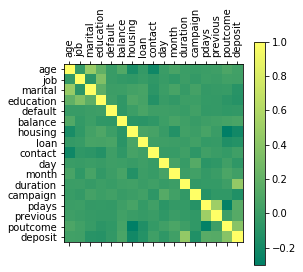

In [ ]:
plt.matshow(new_df.corr(),cmap="summer")
plt.colorbar()

plt.xticks(list(range(len(new_df.columns))),new_df.columns, rotation="vertical")
plt.yticks(list(range(len(new_df.columns))),new_df.columns, rotation="horizontal")

plt.show()

In [ ]:
new_df.corr()["deposit"].sort_values(ascending=False)

deposit      1.000000
duration     0.451919
poutcome     0.388620
pdays        0.151593
previous     0.139867
balance      0.081129
age          0.034901
job          0.030409
month        0.028645
contact      0.022369
default     -0.040680
day         -0.056326
marital     -0.094632
education   -0.104567
loan        -0.110580
campaign    -0.128081
housing     -0.203888
Name: deposit, dtype: float64

([<matplotlib.axis.XTick at 0x2589c6d2a90>,
 <a list of 17 Text xticklabel objects>)

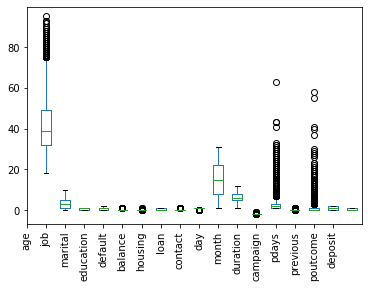

In [ ]:
new_df.plot.box()
plt.xticks(list(range(len(new_df.columns))) ,new_df.columns, rotation='vertical')

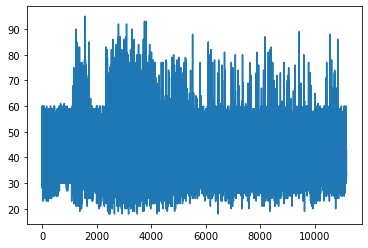

In [ ]:
plt.plot(df.age.values)

(array([ 450., 2994., 3050., 1762., 1599.,  882.,  179.,  174.,   62.,
          10.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <a list of 10 Patch objects>)

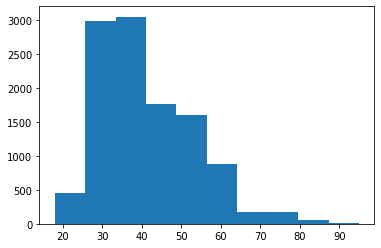

In [ ]:
plt.hist(df.age.values)

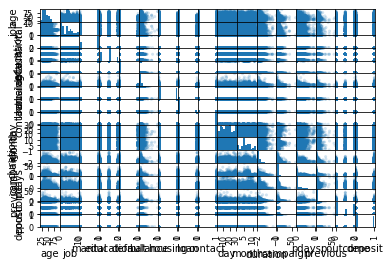

In [ ]:
axes = pd.plotting.scatter_matrix(new_df,alpha=0.2)
plt.show()

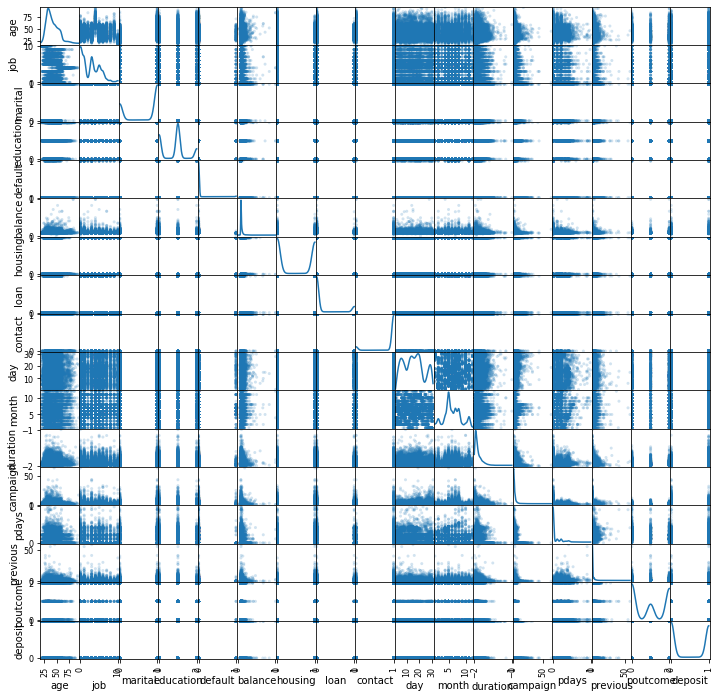

In [ ]:
pd.plotting.scatter_matrix(new_df, alpha=0.2, figsize=(12,12), diagonal="kde")
plt.show()

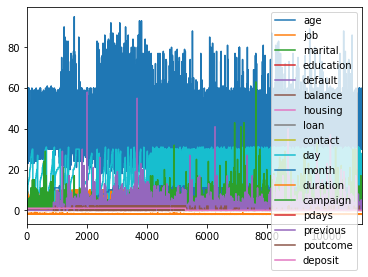

In [ ]:
new_df.plot()

In [ ]:
low=0.01
high=0.99
new_df.quantile([low,high])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0.01,22.0,0.0,0.0,0.0,0.0,0.071833,0.0,0.0,0.0,1.0,1.0,-1.996908,1.0,0.000000,0.0,0.0,0.0
0.99,77.0,10.0,1.0,2.0,1.0,0.227981,1.0,1.0,1.0,31.0,11.0,-1.594133,13.0,0.498702,10.0,2.0,1.0


In [ ]:
qdf=new_df.quantile([low,high])

In [ ]:
qdf.age

0.01    22.0
0.99    77.0
Name: age, dtype: float64

In [ ]:
qdf.age[low]

22.0

In [ ]:
new_df.age=new_df.age.apply(lambda v: v if qdf.age[low]<v<qdf.age[high] else np.nan)

In [ ]:
new_df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,10911.000000,11092.000000,11162.000000,10665.000000,11162.000000,11162.000000,11162.000000,11162.000000,8816.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,2836.000000,11162.000000
mean,40.974429,3.190408,0.684824,0.794749,0.015051,0.095121,0.473123,0.130801,0.912205,15.658036,6.190826,-1.904665,2.508421,0.061205,0.832557,0.944640,0.473840
std,11.013607,2.811062,0.464607,0.666677,0.121761,0.036631,0.499299,0.337198,0.283012,8.420740,2.572792,0.089443,2.722077,0.127203,2.292007,0.898815,0.499338
min,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,0.000000,0.000000,0.000000,0.079147,0.000000,0.000000,1.000000,8.000000,5.000000,-1.964957,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,0.084008,0.000000,0.000000,1.000000,15.000000,6.000000,-1.934811,2.000000,0.000000,0.000000,1.000000,0.000000
75%,49.000000,5.000000,1.000000,1.000000,0.000000,0.097160,1.000000,0.000000,1.000000,22.000000,8.000000,-1.872713,3.000000,0.025439,1.000000,2.000000,1.000000
max,76.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,-1.000515,63.000000,1.000000,58.000000,2.000000,1.000000


In [ ]:
new_df.age.dropna(inplace=True)

In [ ]:
new_df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,10911.000000,11092.000000,11162.000000,10665.000000,11162.000000,11162.000000,11162.000000,11162.000000,8816.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,2836.000000,11162.000000
mean,40.974429,3.190408,0.684824,0.794749,0.015051,0.095121,0.473123,0.130801,0.912205,15.658036,6.190826,-1.904665,2.508421,0.061205,0.832557,0.944640,0.473840
std,11.013607,2.811062,0.464607,0.666677,0.121761,0.036631,0.499299,0.337198,0.283012,8.420740,2.572792,0.089443,2.722077,0.127203,2.292007,0.898815,0.499338
min,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,0.000000,0.000000,0.000000,0.079147,0.000000,0.000000,1.000000,8.000000,5.000000,-1.964957,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,0.084008,0.000000,0.000000,1.000000,15.000000,6.000000,-1.934811,2.000000,0.000000,0.000000,1.000000,0.000000
75%,49.000000,5.000000,1.000000,1.000000,0.000000,0.097160,1.000000,0.000000,1.000000,22.000000,8.000000,-1.872713,3.000000,0.025439,1.000000,2.000000,1.000000
max,76.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,-1.000515,63.000000,1.000000,58.000000,2.000000,1.000000


In [ ]:
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,5.0,1,1.0,0,0.104371,1,0,NaN,5,5,-1.732028,1,0.0,0,NaN,1
1,56.0,5.0,1,1.0,0,0.078273,0,0,NaN,5,5,-1.622520,1,0.0,0,NaN,1
2,41.0,1.0,1,1.0,0,0.092185,1,0,NaN,5,5,-1.642618,1,0.0,0,NaN,1
3,55.0,6.0,1,1.0,0,0.105882,1,0,NaN,5,5,-1.851327,1,0.0,0,NaN,1
4,54.0,5.0,1,0.0,0,0.079851,0,0,NaN,5,5,-1.827106,2,0.0,0,NaN,1


In [ ]:
new_df.age.unique()

array([59., 56., 41., 55., 54., 42., 60., 37., 28., 38., 30., 29., 46.,
       31., 35., 32., 49., 43., 26., 40., 33., 23., 48., 45., 36., 52.,
       53., 39., 57., 51., 44., 24., 50., 27., 34., 47., 25., 58., 61.,
       68., 75., 69., 66., 72., 67., 71., 74., 65., 62., 70., 76., 73.,
       63., 64.])

{'whiskers': [<matplotlib.lines.Line2D at 0x258a873f400>,
 'caps': [<matplotlib.lines.Line2D at 0x258a873f240>,
 'boxes': [<matplotlib.lines.Line2D at 0x258a873f5f8>],
 'medians': [<matplotlib.lines.Line2D at 0x258ad7a0160>],
 'fliers': [<matplotlib.lines.Line2D at 0x258ad7a0c50>],
 'means': []}

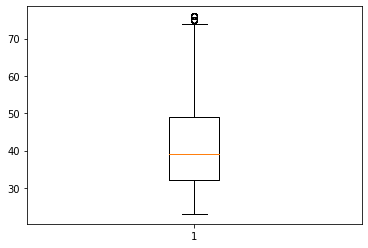

In [ ]:
plt.boxplot(new_df.age)

In [ ]:
new_df.cov()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,121.299529,-0.129273,2.360963,1.310578,-0.012988,0.036511,-0.893794,-0.082112,-0.501409,-0.049743,1.985006,-0.009250,-0.082328,-0.000977,0.223684,0.883638,0.141818
job,-0.129273,7.902070,-0.094560,0.650920,-0.003769,-0.003866,-0.069603,-0.016104,-0.048289,-0.308940,-0.343745,0.002003,-0.253367,0.004870,-0.001184,0.097537,0.042684
marital,2.360963,-0.094560,0.215860,0.053746,0.000354,0.000255,0.010165,0.010228,-0.009749,0.015498,0.077083,-0.000991,0.058384,-0.001849,-0.025362,-0.008594,-0.021954
education,1.310578,0.650920,0.053746,0.444459,0.001279,-0.001279,0.032466,0.012784,-0.021094,-0.068629,-0.074072,0.000791,0.025060,-0.002584,-0.050886,-0.042630,-0.034804
default,-0.012988,-0.003769,0.000354,0.001279,0.014826,-0.000272,0.000673,0.003138,0.000632,0.017781,0.002055,-0.000106,0.010267,-0.000562,-0.009844,-0.002607,-0.002473
balance,0.036511,-0.003866,0.000255,-0.001279,-0.000272,0.001342,-0.001410,-0.001045,-0.000634,0.003229,0.006015,0.000074,-0.001385,0.000081,0.002586,0.002021,0.001484
housing,-0.893794,-0.069603,0.010165,0.032466,0.000673,-0.001410,0.249300,0.012924,0.008436,-0.062099,-0.151577,0.001565,0.009052,0.004096,-0.000962,-0.134029,-0.050833
loan,-0.082112,-0.016104,0.010228,0.012784,0.003138,-0.001045,0.012924,0.113702,0.001982,0.049034,0.004605,-0.000058,0.031870,-0.001305,-0.017519,-0.035939,-0.018619
contact,-0.501409,-0.048289,-0.009749,-0.021094,0.000632,-0.000634,0.008436,0.001982,0.080096,-0.041079,-0.013268,0.000512,-0.046331,0.001056,-0.000890,-0.006287,0.003156
day,-0.049743,-0.308940,0.015498,-0.068629,0.017781,0.003229,-0.062099,0.049034,-0.041079,70.908854,1.309236,-0.013942,3.140457,-0.082726,-1.138351,0.210844,-0.236838


In [ ]:
new_df.to_csv("./downloads/preprocessed.csv",index=False)

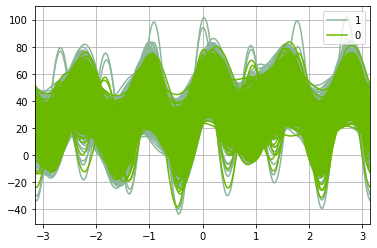

In [ ]:
from pandas.plotting import andrews_curves
andrews_curves(new_df,'deposit')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000258BB7F3978>,
      dtype=object)

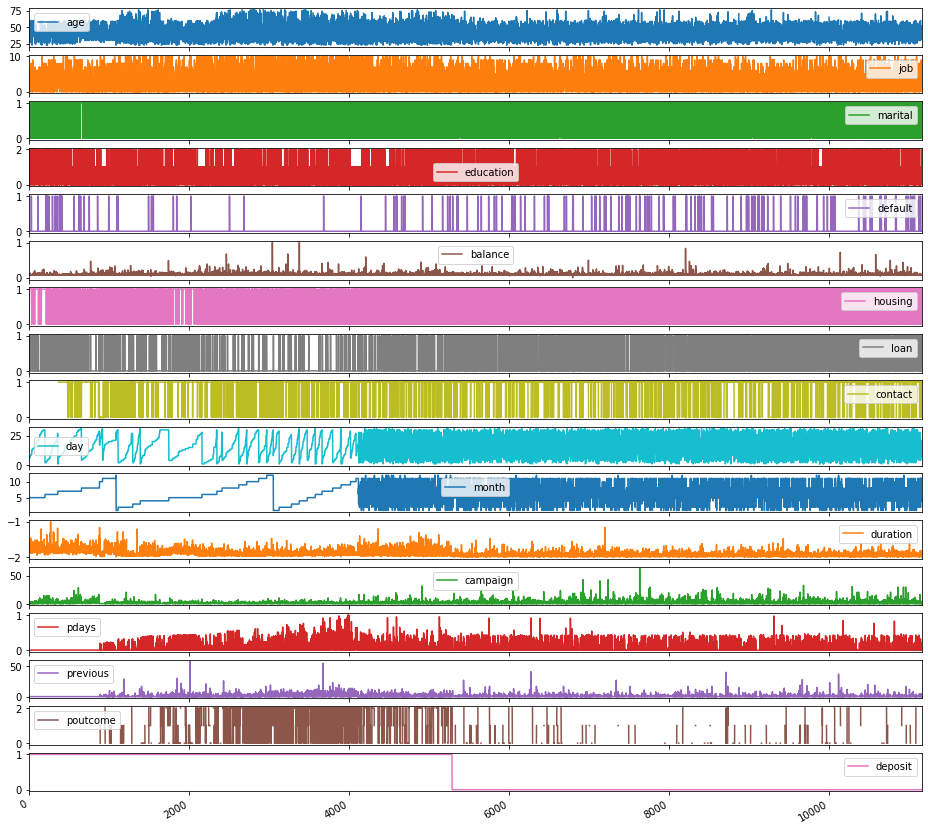

In [ ]:
new_df.plot(subplots=True,figsize=(16,16))

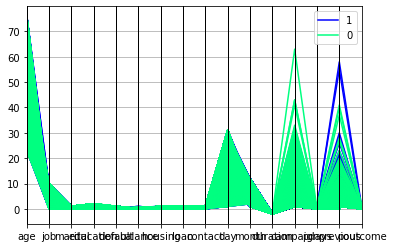

In [ ]:
pd.plotting.parallel_coordinates(new_df,'deposit',colormap='winter')
plt.show()

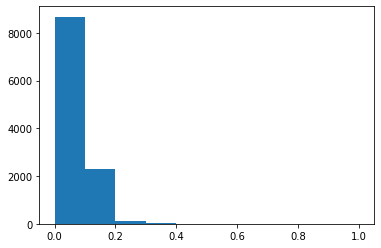

In [ ]:
plt.hist(new_df.balance.values)
plt.show()

In [ ]:
new_df.deposit.unique()

array([1, 0], dtype=int64)

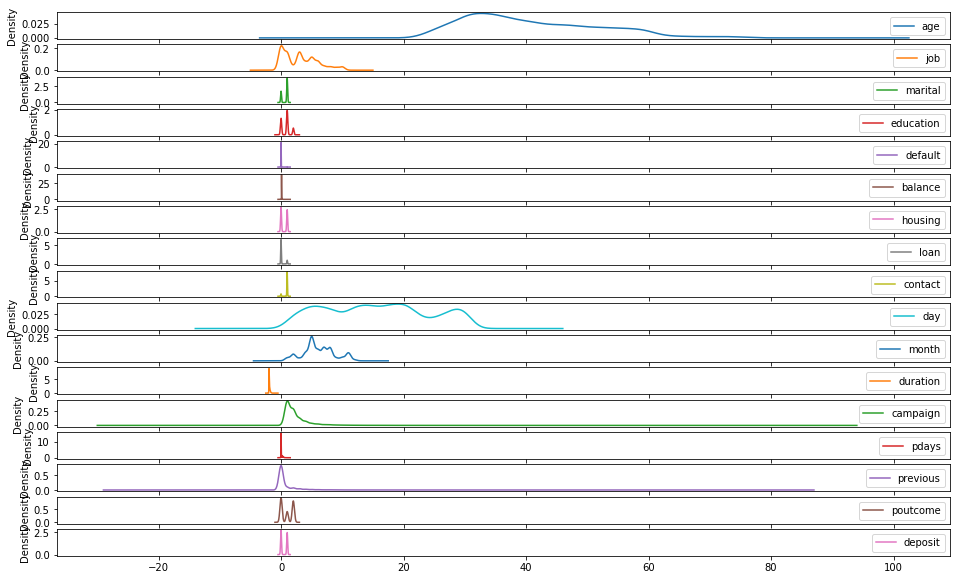

In [ ]:
new_df.plot.kde(subplots=True,figsize=(16,10))
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000258BC32AC50>,
      dtype=object)

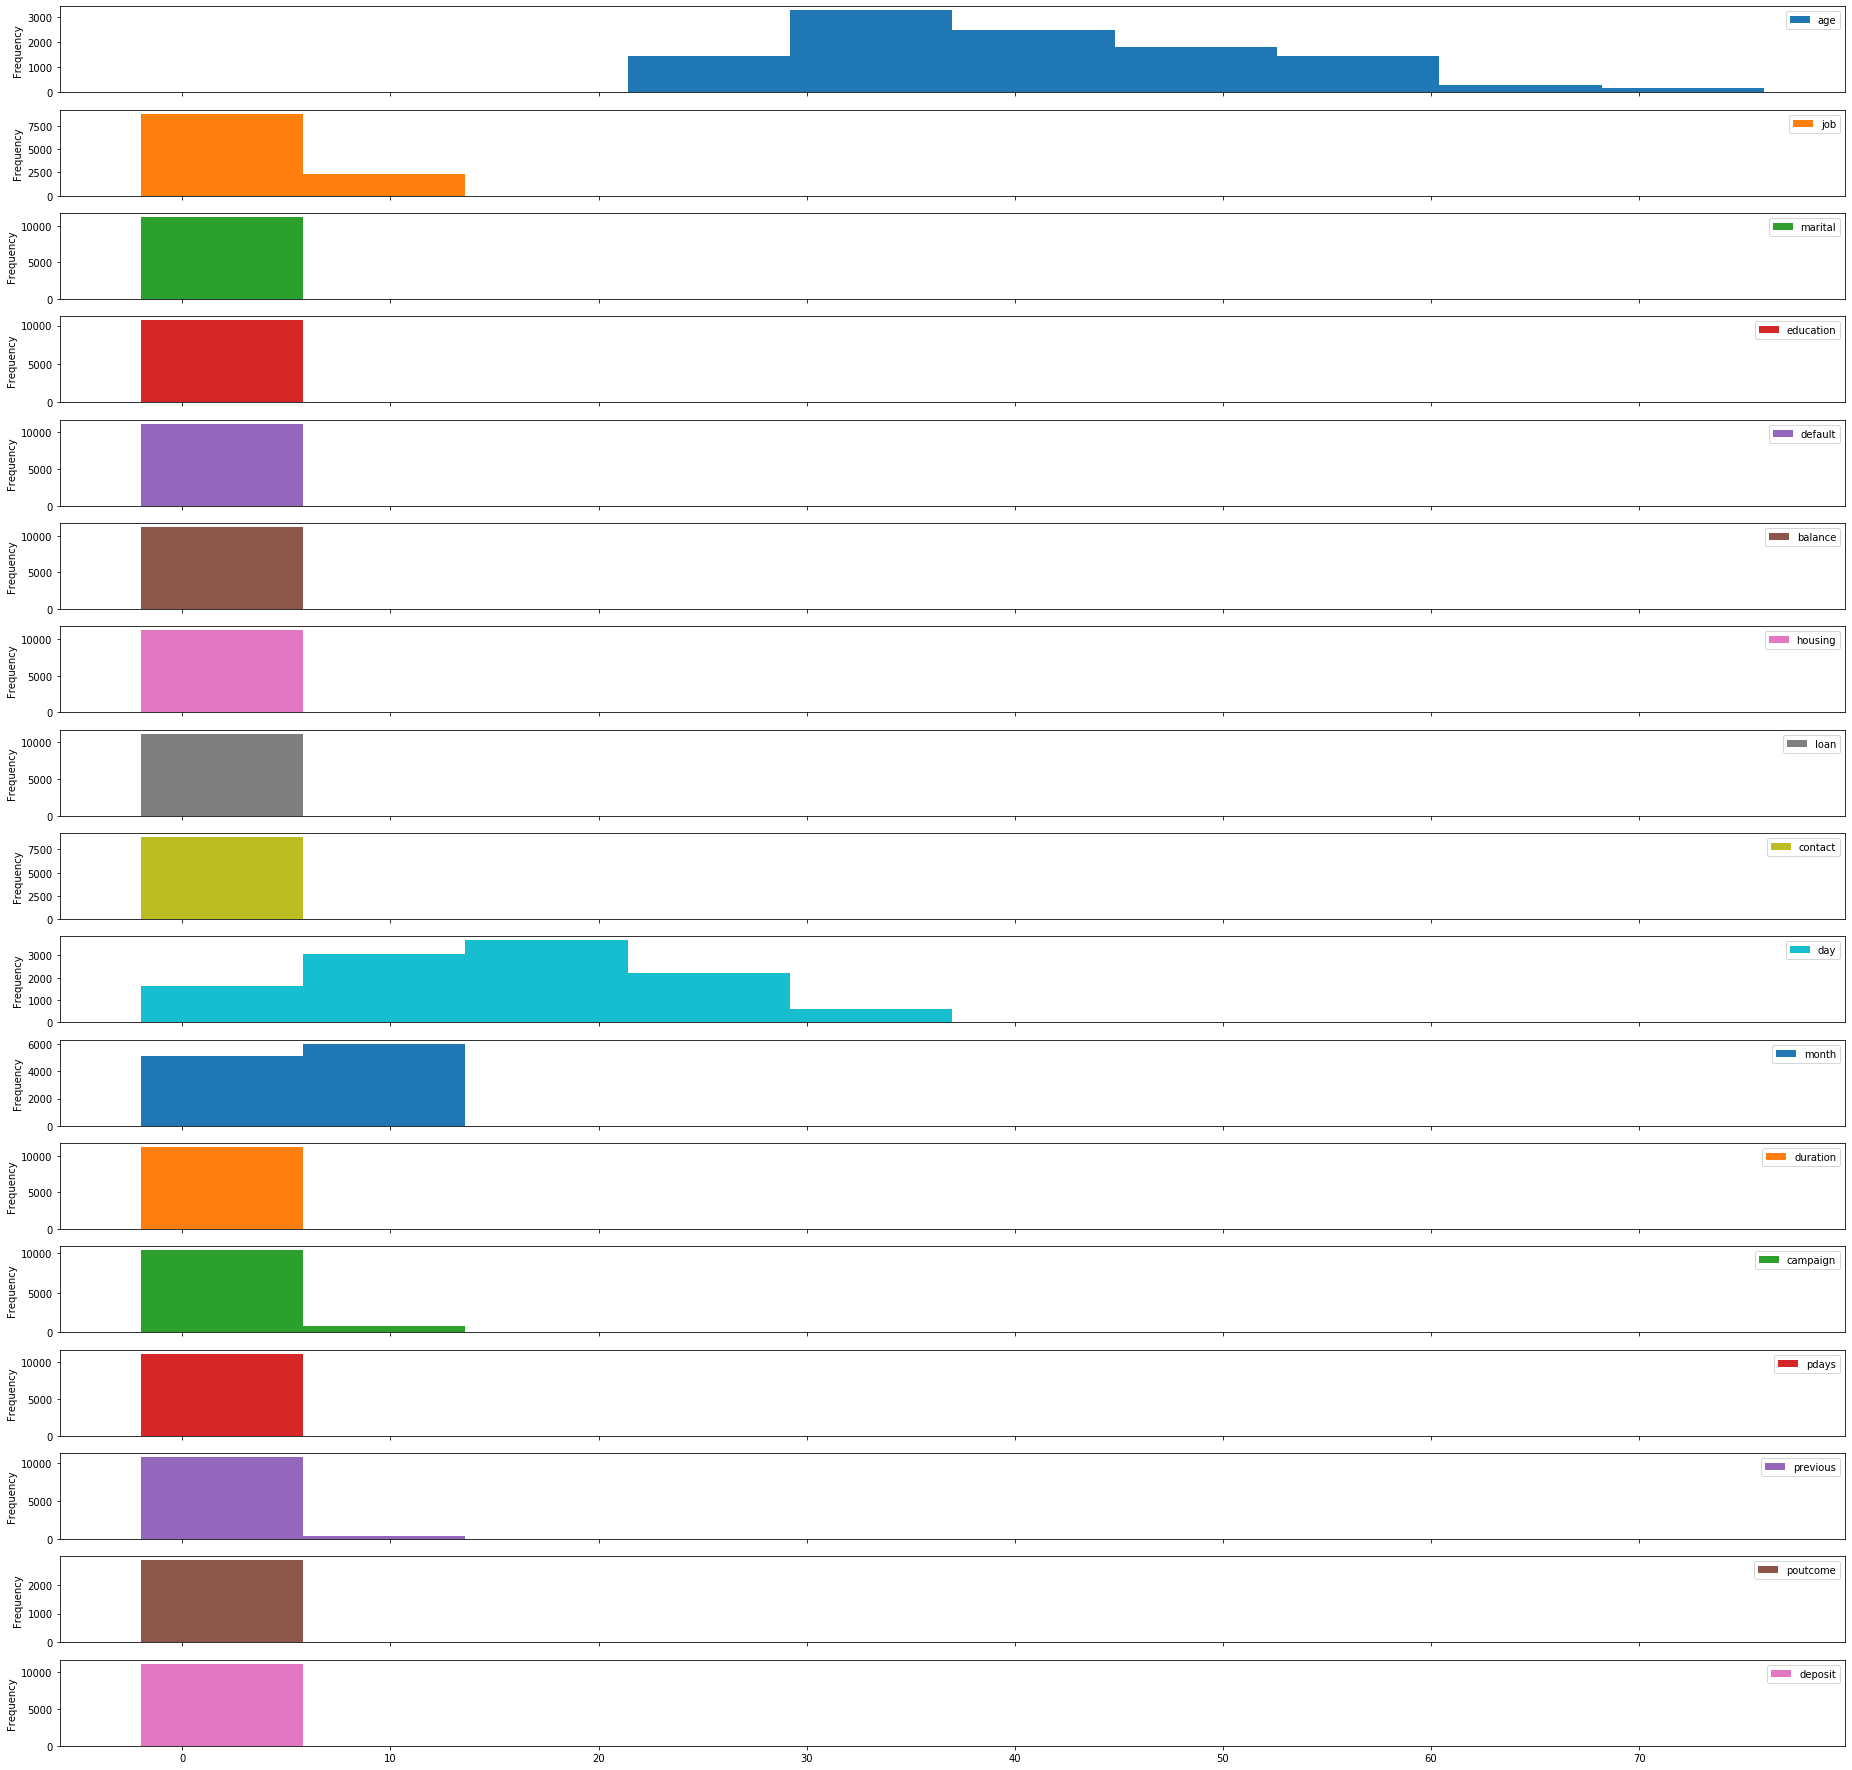

In [ ]:
new_df.plot.hist(subplots=True, figsize=(32,32))